In [65]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False
import numpy as np
%matplotlib inline

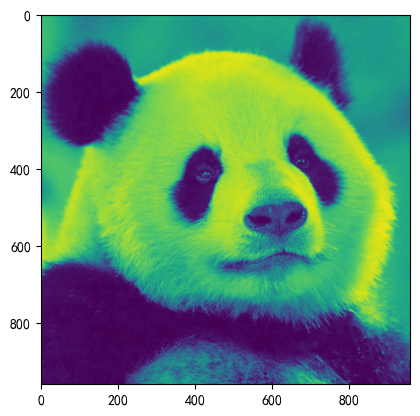

In [66]:
img = cv2.imread("panda.jpg")
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)

In [69]:
def DotComputing(img,a,b):
    result = img.copy()
    result = result*a+b
    result = np.clip(result,0,255)
    return result

Text(0.5, 1.0, 'a=1,b=-50')

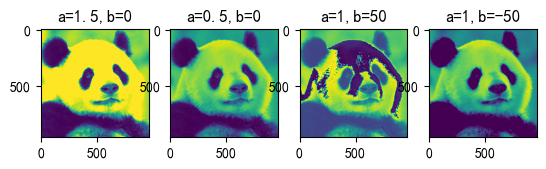

In [70]:
plt.subplot(1,4,1)
plt.imshow(DotComputing(gray_img,1.5,0))
plt.title("a={},b={}".format(1.5,0))
plt.subplot(1,4,2)
plt.imshow(DotComputing(gray_img,0.5,0))
plt.title("a={},b={}".format(0.5,0))
plt.subplot(1,4,3)
plt.imshow(DotComputing(gray_img,1,50))
plt.title("a={},b={}".format(1,50))
plt.subplot(1,4,4)
plt.imshow(DotComputing(gray_img,1,-50))
plt.title("a={},b={}".format(1,-50))

对图像放大两倍，并使用最近邻插值法和双线性插值法

In [61]:
def nearest_neighbour(src):
    # 获取原图维度
    src = np.array(src,dtype=np.uint8)
    src_height, src_width = src.shape[0],src.shape[1]
    # 计算新图维度
    dst_height, dst_width, channels = src_height*2,src_width*2,3

    dst = np.zeros(shape = (dst_height, dst_width, channels), dtype=np.uint8)
    for dst_x in range(dst_height):
        for dst_y in range(dst_width):
            # 寻找源图像对应坐标
            src_x = dst_x * (src_width/dst_width)
            src_y = dst_y * (src_width/dst_width)
            
            # 四舍五入会超出索引，这里采用向下取整，也就是原本1.5->2, 现在是1.5->1             
            src_x = int(src_x)             
            src_y = int(src_y)

            # 插值
            dst[dst_x, dst_y,:] = src[src_x, src_y, :]
    return dst

def bilinear_interpolation(src):
    # 获取原图维度
    src = np.array(src,dtype=np.uint8)
    src_height, src_width = src.shape[0],src.shape[1]
    # 计算新图维度
    dst_height, dst_width, channels = src_height*2+1,src_width*2+1,3
    
    dst = np.zeros(shape = (dst_height, dst_width, channels), dtype=np.uint8)
    for dst_x in range(dst_height-1):
        for dst_y in range(dst_width-1):
            # 寻找源图像对应坐标
            src_x = (dst_x+0.5) * (src_width/dst_width) - 0.5
            src_y = (dst_y+0.5) * (src_width/dst_width) - 0.5
            
            # 计算插值
            i, j = int(src_x), int(src_y)
            u, v = src_x - i, src_y - j
            f = (1-u)*(1-v)*src[i,j] + (1-u)*v*src[i,j+1] + u*(1-v)*src[i+1,j] + u*v*src[i+1,j+1]
            f = np.clip(f, 0, 255)   # 处理一下越界的数据

            # 插值
            dst[dst_x, dst_y,:] = f.astype(np.uint8)
    return dst

(1918, 1918)


Text(0.5, 1.0, '双线性插值')

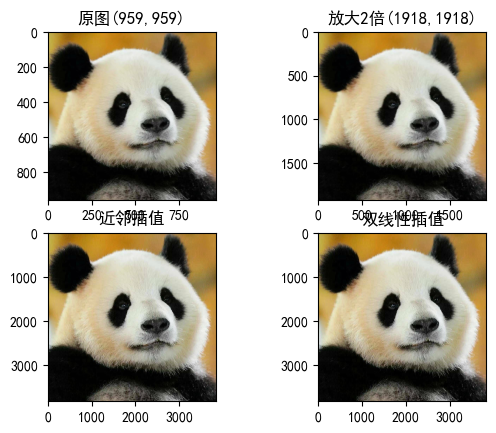

In [62]:
from torchvision import transforms


img = Image.open("panda.jpg")
w,h = img.size
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("原图({},{})".format(w,h))
transform = transforms.Resize((2*w,2*h))
resized_img = transform(img)
print(resized_img.size)
plt.subplot(2,2,2)
plt.imshow(resized_img)
plt.title("放大2倍({},{})".format(resized_img.size[0],resized_img.size[1]))
plt.subplot(2,2,3)
nn_img = nearest_neighbour(resized_img)
plt.imshow(nn_img)
plt.title("近邻插值")
plt.subplot(2,2,4)
bi_img = bilinear_interpolation(resized_img)
plt.imshow(bi_img)
plt.title("双线性插值")

将图像旋转45度，并使用近邻插值法和双线性插值法

(1918, 1918)


Text(0.5, 1.0, '双线性插值')

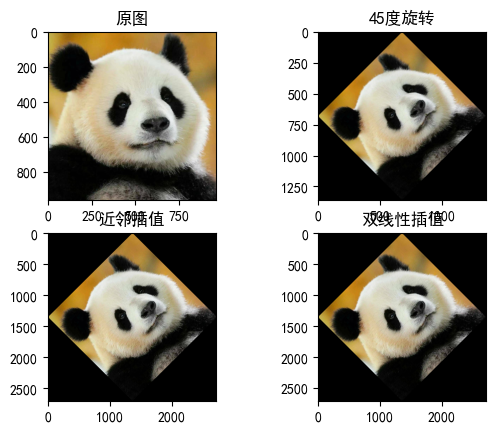

In [64]:
from torchvision import transforms


img = Image.open("panda.jpg")
w,h = img.size
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("原图")
transform = transforms.RandomRotation(degrees=(45,45),expand=True)
rotated_img = transform(img)
print(resized_img.size)
plt.subplot(2,2,2)
plt.imshow(rotated_img)
plt.title("45度旋转")
plt.subplot(2,2,3)
nn_img = nearest_neighbour(rotated_img)
plt.imshow(nn_img)
plt.title("近邻插值")
plt.subplot(2,2,4)
bi_img = bilinear_interpolation(rotated_img)
plt.imshow(bi_img)
plt.title("双线性插值")